# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
#The Dataset collected was represented by total of 17 campaigns corresponding to 79354 contacts


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,  ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn import set_config
set_config(display="diagram")
warnings.simplefilter(action='ignore', category=FutureWarning)


In [229]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [143]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [144]:
#Check null values, The data appears pretty clean wit no null values
df.isnull().values.any()

False

In [145]:
# Browse the unique values for each field
df.apply(lambda x: len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [146]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [147]:
for col in list(df.select_dtypes(include=['object']).columns):
    print(f'Unique Values:{col}')
    print(df[col].value_counts())

Unique Values:job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Unique Values:marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Unique Values:education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Unique Values:default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
Unique Values:housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
Unique Values:loan
no         33950
yes         6248
unknown      990
Na

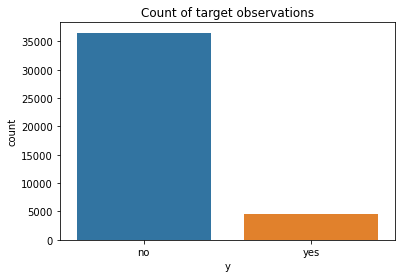

In [148]:
sns.countplot(data=df, x = 'y')
plt.title('Count of target observations');
# Extremely unbalanced out classes, may need to use stratify or shuffle during data splitiing

In [149]:
# The data looks clean and there are no missing values. There are 10 categorical fields, which can be passed through column tranformers
df.corr()
# The correlation matrix does't show a strong correlation between the independent numerical features.


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


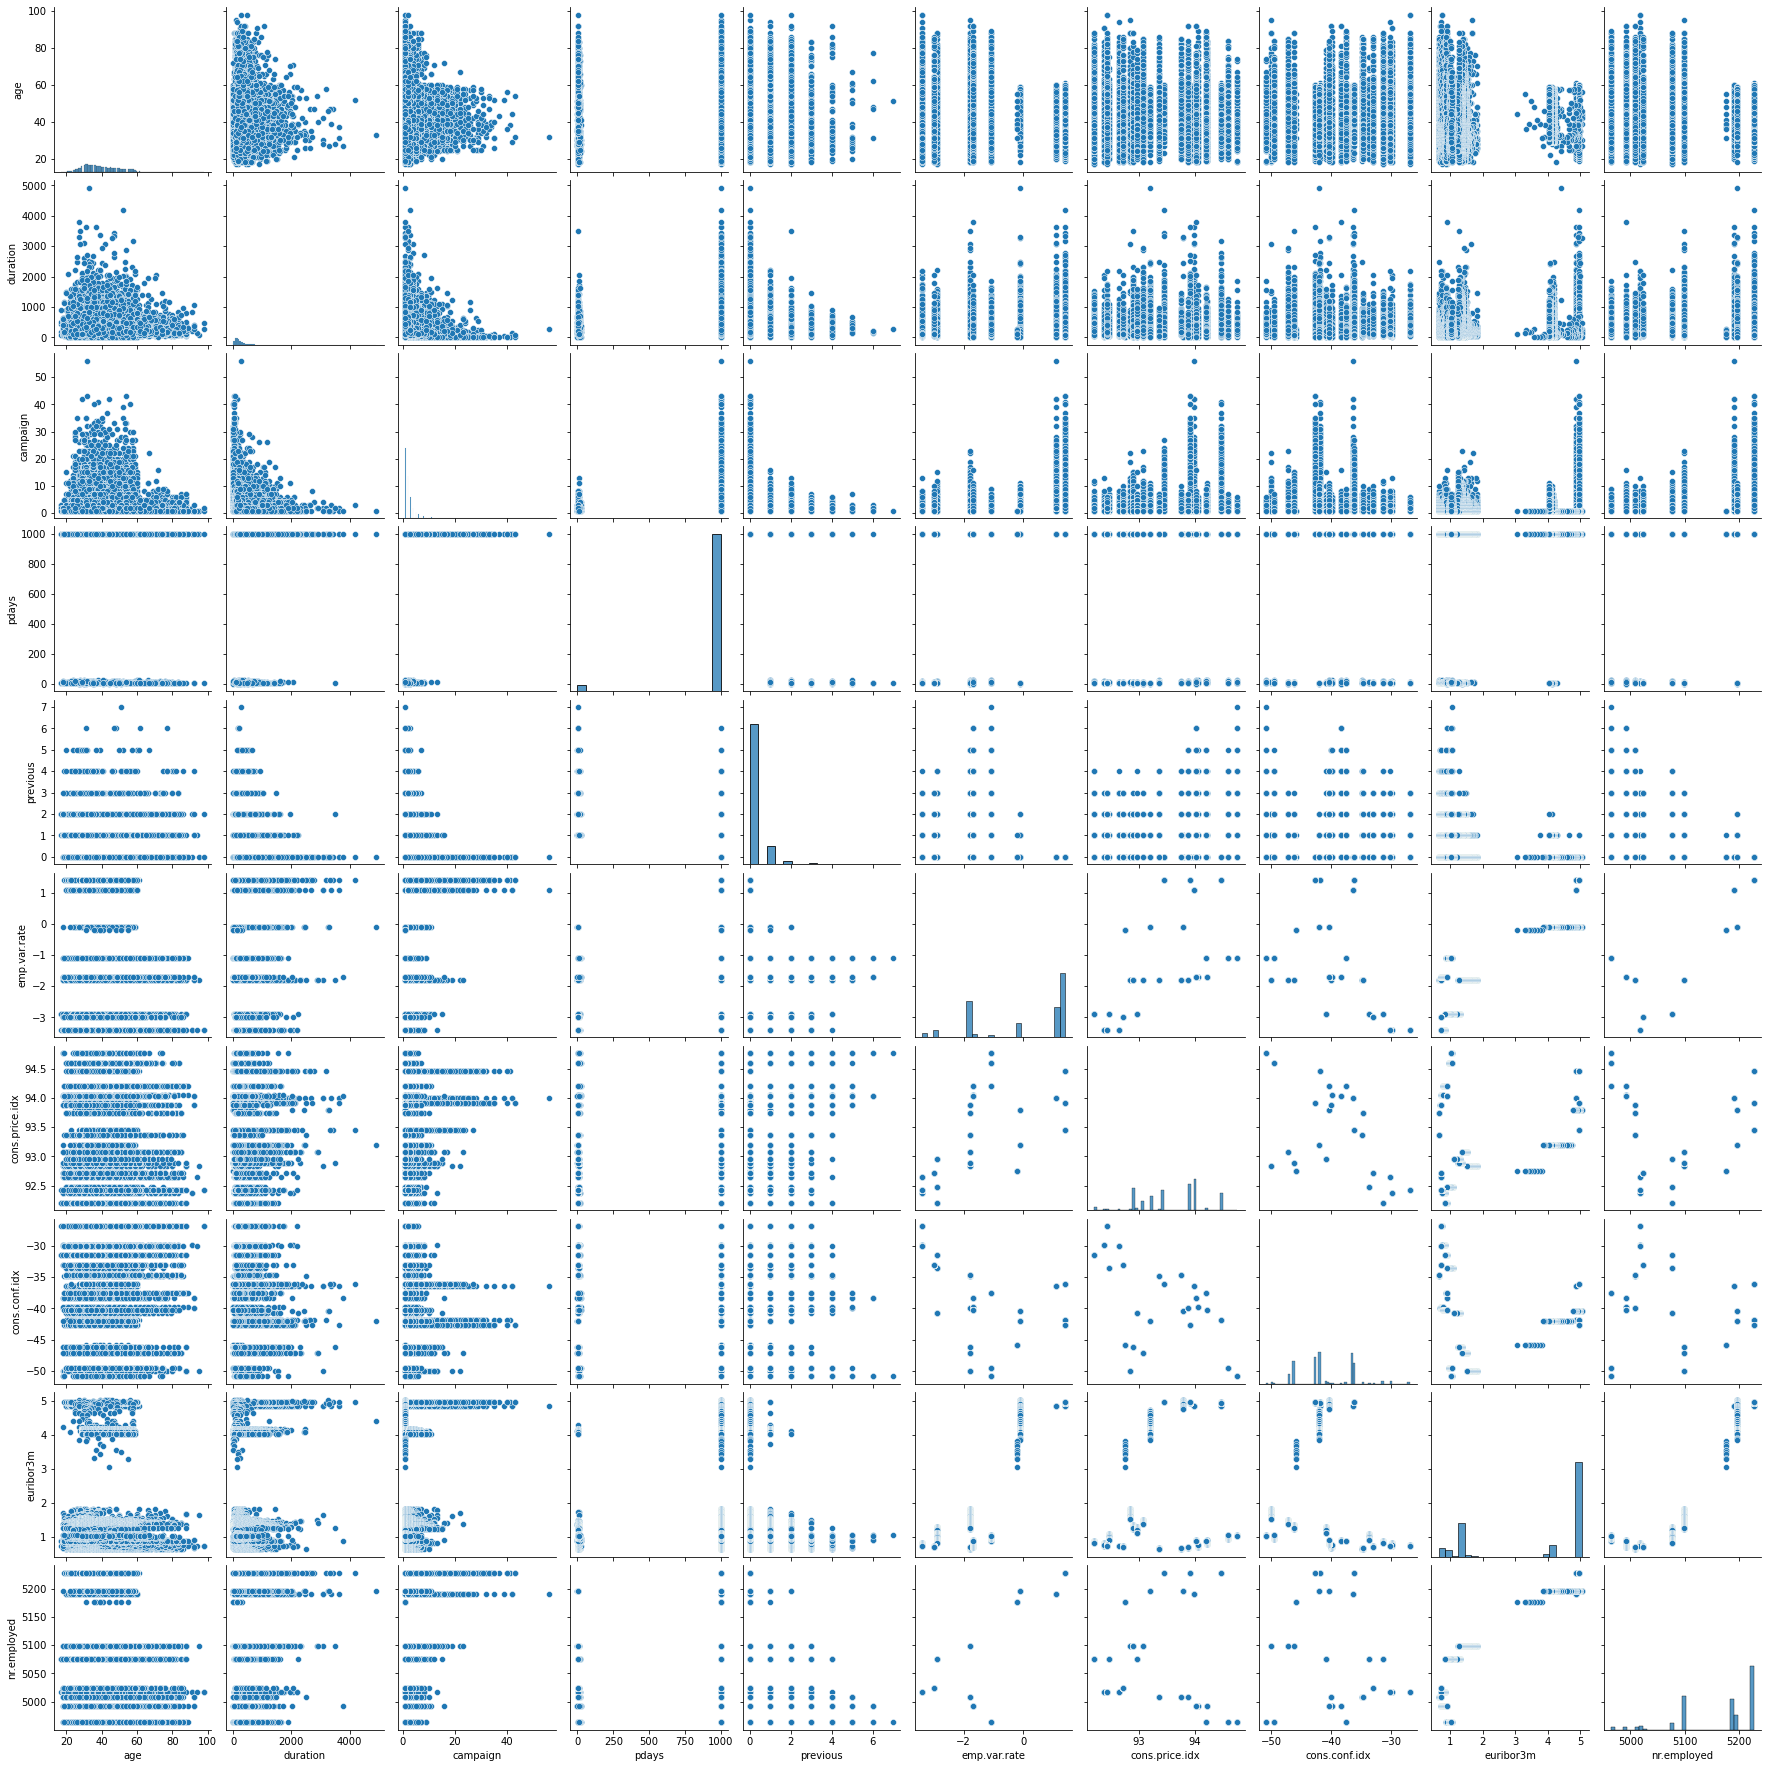

In [150]:
sns.pairplot(df.iloc[:,:])
# The visualization confirms the absence of string coorelation between features

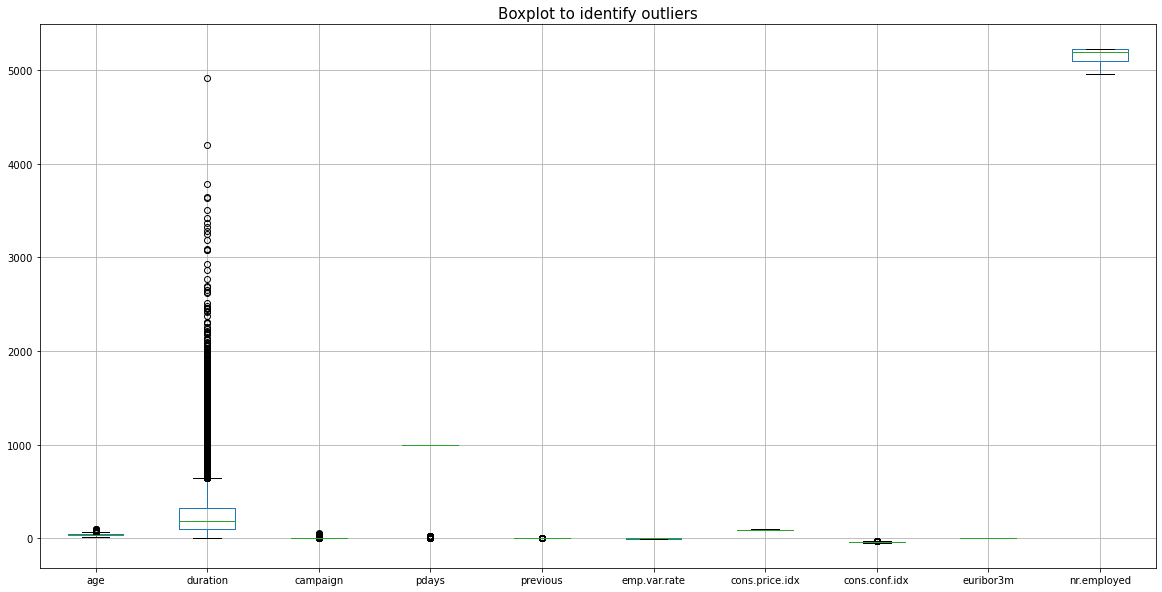

In [15]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.title("Boxplot to identify outliers", fontsize = 15)
print()
# The boxplot shows that Age and Duration exhibit some outliers, let's look at these features individually to identify the relevant range

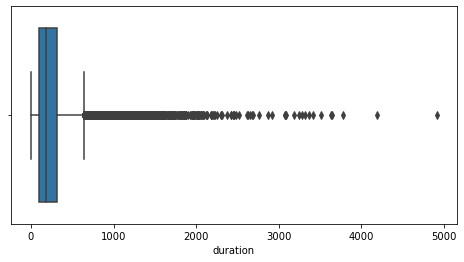

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration'])
plt.show()

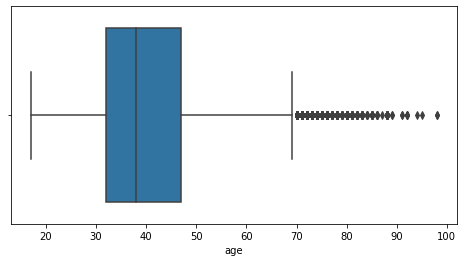

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['age'])
plt.show()

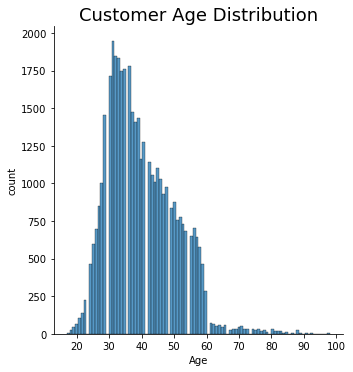

In [18]:
sns.displot(df['age'])
plt.title('Customer Age Distribution', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
#The age exhibits a normal distribution

Text(0.5, 1.0, 'Education vs Age Target density ')

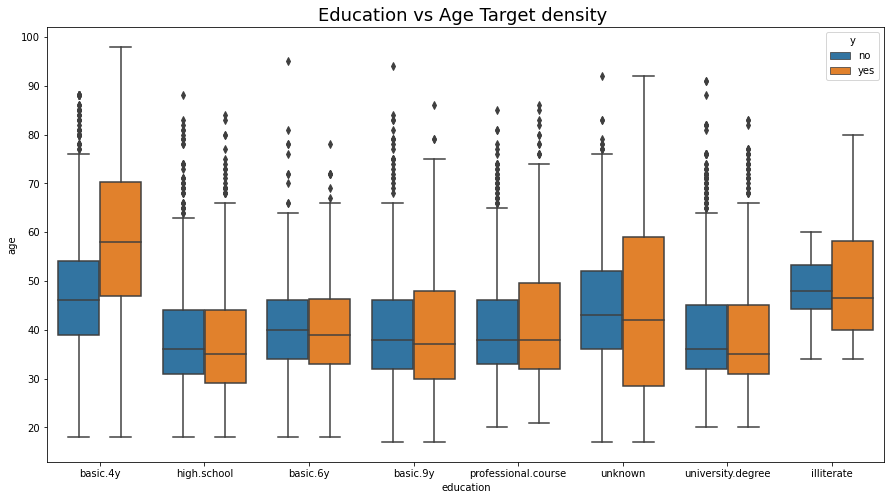

In [236]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df,x='education',y='age',hue='y')
plt.title('Education vs Age Target density ', fontsize = 18)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### The objective of the task is to determine the best predictive model to identify the customers who are most likely to subscribe to term deposit. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
#remove outliers
df_final=df[(df['age']>20) & (df['age']<70) ]

In [21]:
#create columns with only first 7 columns
df_final=df_final[['age','job','marital','education','default','housing','loan','y']]

In [22]:
df_final
df_final.shape

(40579, 8)

In [154]:
# The categorical fields can be transformed using  ordinal and one hot encoder. The numerical fields can be passed through
# Standard scaler
num_cols = ['age'] 
ordinal_cols =  ['education'] 
ohe_cols = ['job','marital', 'default', 'housing', 'loan']

In [155]:
df_final['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [156]:
X = df_final.drop('y', axis = 1)
y = df_final['y']

ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),
(OrdinalEncoder(categories = [['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate']]), ordinal_cols),
                                             
                                          remainder=StandardScaler())


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [157]:
# Splitting the data using 70:30 ratio using stratify to reduce sampling error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,stratify = df_final.y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [158]:
y_test.value_counts(normalize = True)

no     0.892476
yes    0.107524
Name: y, dtype: float64

In [ ]:
# The baseline seems to be around 89%

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Logistic Regression


In [159]:
%%time
lr_model = Pipeline([('transformer', ordinal_ohe_transformer),
     ('logreg', LogisticRegression(max_iter=10000))])
lr_model.fit(X_train, y_train)
y_predict_train = lr_model.predict(X_train)
y_predict_test = lr_model.predict(X_test)

CPU times: total: 516 ms
Wall time: 517 ms


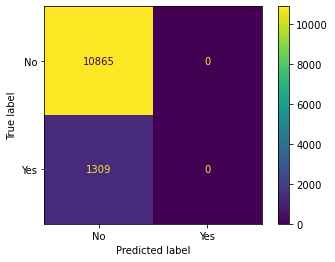

In [160]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['No', 'Yes'])
disp.plot()
plt.grid(False)
plt.show()

In [ ]:
# The confusion matrix for a simple logistic regression does't seem to predict any customers who are willing to subscribe,
# hence it is not very helpful.

### Problem 9: Score the Model

What is the accuracy of your model?

In [31]:
lr_train = accuracy_score(y_train, y_predict_train)
lr_test = accuracy_score(y_test, y_predict_test)

print(f'Train Accuracy: {lr_train}')
print(f'Test Accuracy: {lr_test} ')

Train Accuracy: 0.8925189227248724
Test Accuracy: 0.8924757680302283 


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### KNN

In [32]:
%%time
knn_model = Pipeline([('transformer', ordinal_ohe_transformer),
     ('logreg', KNeighborsClassifier())])
knn_model.fit(X_train, y_train)
y_predict_train = knn_model.predict(X_train)
y_predict_test = knn_model.predict(X_test)

CPU times: total: 58.6 s
Wall time: 59.1 s


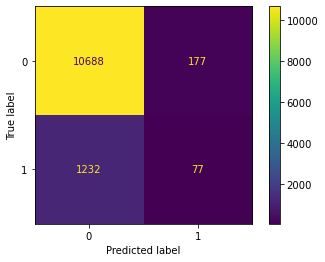

In [33]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [34]:
knn_train = accuracy_score(y_train, y_predict_train)
knn_test = accuracy_score(y_test, y_predict_test)

print(f'Train Accuracy: {knn_train}')
print(f'Test Accuracy: {knn_test} ')

Train Accuracy: 0.8949128674529132
Test Accuracy: 0.8842615409889929 


### Decision Tree

In [35]:
%%time
dt_model = Pipeline([('transformer', ordinal_ohe_transformer),
     ('dt', DecisionTreeClassifier())])
dt_model.fit(X_train, y_train)
y_predict_train = dt_model.predict(X_train)
y_predict_test = dt_model.predict(X_test)

CPU times: total: 734 ms
Wall time: 740 ms


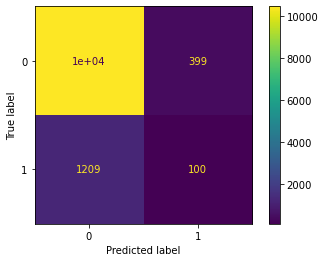

In [36]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [37]:
dt_train = accuracy_score(y_train, y_predict_train)
dt_test = accuracy_score(y_test, y_predict_test)

print(f'Train Accuracy: {dt_train}')
print(f'Test Accuracy: {dt_test} ')

Train Accuracy: 0.9193451857067417
Test Accuracy: 0.8679152291769344 


### SVM

In [38]:
%%time
svm_model = Pipeline([('transformer', ordinal_ohe_transformer),
     ('dt', SVC( kernel= 'rbf'))])
svm_model.fit(X_train, y_train)
y_predict_train = svm_model.predict(X_train)
y_predict_test = svm_model.predict(X_test)

CPU times: total: 1min 16s
Wall time: 1min 17s


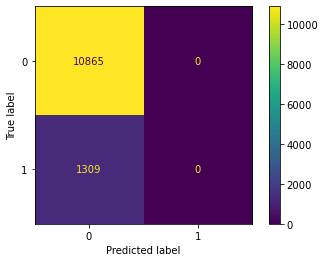

In [39]:
confusion_mat  = confusion_matrix(y_test, y_predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot()
plt.grid(False)
plt.show()

In [40]:
svm_train = accuracy_score(y_train, y_predict_train)
svm_test = accuracy_score(y_test, y_predict_test)

print(f'Train Accuracy: {svm_train}')
print(f'Test Accuracy: {svm_test} ')

Train Accuracy: 0.8925189227248724
Test Accuracy: 0.8924757680302283 


In [41]:
res_dict = {'model': ['Logistic Regression','KNN', 'Decision Tree', 'SVC'],
           'train accuracy': [89, 89, 91, 89],
           'test accuracy': [89, 88, 86, 89],
           'train time/seconds': [.8, 47, 1, 56]}
results_df = pd.DataFrame(res_dict).set_index('model')
results_df

,train accuracy,test accuracy,train time/seconds
model,,,
Logistic Regression,89,89,0.8
KNN,89,88,47.0
Decision Tree,91,86,1.0
SVC,89,89,56.0


#### Although logistic regression took the least amount of time to train the model and had a good accuracy the confusion matrix indicates that decision tree is able to better predict the customers who will subscribe. The training time is comparable. KNN and SVC took a lot longer to train. Let's try to tune our model by overriding the defaults and using more features.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [171]:
# Since most of the models were not very useful, let's reconsider our dataset to include all features. 
# Clean up a bit to remove redundent data and insignificant fields
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [172]:
# remove outliers 
df_all=df[(df['age']>20) & (df['age']<70) ]

In [173]:
df_all=df[(df['duration']<1000) ]

In [174]:
df_all.shape


(40227, 21)

<AxesSubplot:>

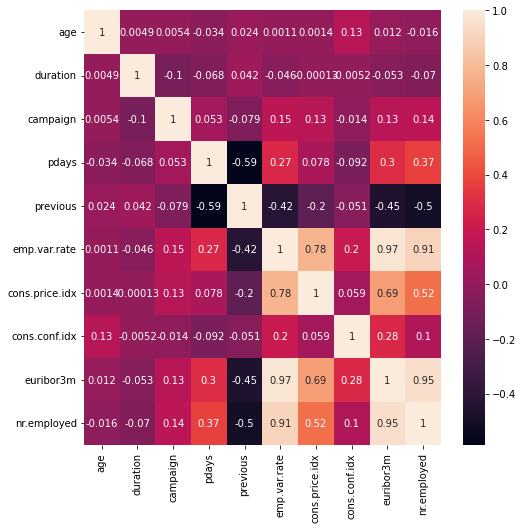

In [175]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_all.corr(), annot=True) 

In [176]:
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
ordinal_cols =  ['education','month','day_of_week'] 
ohe_cols = ['marital', 'default', 'housing', 'loan','contact','poutcome','job']

In [177]:
df_all['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [178]:
df_all['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [179]:
df_all['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [180]:
df_all['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [181]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40227 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40227 non-null  int64  
 1   job             40227 non-null  object 
 2   marital         40227 non-null  object 
 3   education       40227 non-null  object 
 4   default         40227 non-null  object 
 5   housing         40227 non-null  object 
 6   loan            40227 non-null  object 
 7   contact         40227 non-null  object 
 8   month           40227 non-null  object 
 9   day_of_week     40227 non-null  object 
 10  duration        40227 non-null  int64  
 11  campaign        40227 non-null  int64  
 12  pdays           40227 non-null  int64  
 13  previous        40227 non-null  int64  
 14  poutcome        40227 non-null  object 
 15  emp.var.rate    40227 non-null  float64
 16  cons.price.idx  40227 non-null  float64
 17  cons.conf.idx   40227 non-null 

In [182]:
X = df_all.drop('y', axis = 1)
y = df_all['y']

In [183]:
ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ohe_cols),
# (OrdinalEncoder(categories = [['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate'],['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
#       'sep'],[['mon', 'tue', 'wed', 'thu', 'fri']]]), ordinal_cols),
          (OrdinalEncoder(),ordinal_cols) ,                                  
                                          remainder=StandardScaler())

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [185]:
X_train.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35854,58,retired,married,basic.9y,no,no,yes,cellular,may,fri,235,2,999,0,nonexistent,-1.8,92.893,-46.2,1.259,5099.1
32140,38,admin.,married,high.school,no,yes,no,cellular,may,fri,213,5,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
41057,30,management,married,university.degree,no,no,yes,cellular,oct,wed,255,1,6,1,success,-1.1,94.601,-49.5,1.043,4963.6
31202,28,technician,single,professional.course,no,no,no,cellular,may,wed,116,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
4188,37,blue-collar,single,university.degree,no,yes,no,telephone,may,mon,492,9,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0


### Logistic Regression with Hyperparameters

In [186]:
lgr_params = {'lgr__penalty': ['l1', 'l2'],'lgr__C': np.logspace(-3,3,7),'lgr__solver'  : ['liblinear']},

lgr_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
#     ('scaler', StandardScaler()),
    ('lgr', LogisticRegression(class_weight='balanced',max_iter=10000))
])

lgr_grid = GridSearchCV(lgr_pipe, param_grid=lgr_params, scoring='roc_auc',cv=5)
print(lgr_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'lgr', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'lgr__C', 'lgr__class_weight', 'lgr__dual', 'lgr__fit_intercept', 'lgr__intercept_scaling', 'lgr__l1_ratio', 'lgr__max_iter', 'lgr__multi_class', 'lgr__n_jobs', 'lgr__penalty', 'lgr__ra

In [187]:
%%time
lgr_grid.fit(X_train, y_train)

CPU times: total: 56 s
Wall time: 56.1 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('lgr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             param_grid=({'lgr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'lgr__penalty': ['l1', 'l2'],
                          'lgr__solver': ['liblinear']},),
             scoring='roc_auc')

In [188]:
print(lgr_grid.best_params_)

{'lgr__C': 1.0, 'lgr__penalty': 'l1', 'lgr__solver': 'liblinear'}


In [189]:
y_predict_train = lgr_grid.predict(X_train)
y_predict_test = lgr_grid.predict(X_test)
y_hat_probs = lgr_grid.predict_proba(X_test)
print('ROCAUC score:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('Train Accuracy score:', accuracy_score(y_train, y_predict_train))
print('Test Accuracy score:', accuracy_score(y_test, y_predict_test))
# print('F1 score:',f1_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

ROCAUC score: 0.9353873159499878
Train Accuracy score: 0.8539669010583139
Test Accuracy score: 0.8571546938437319
              precision    recall  f1-score   support

          No       0.98      0.86      0.92     10874
         Yes       0.40      0.87      0.55      1195

    accuracy                           0.86     12069
   macro avg       0.69      0.86      0.73     12069
weighted avg       0.93      0.86      0.88     12069



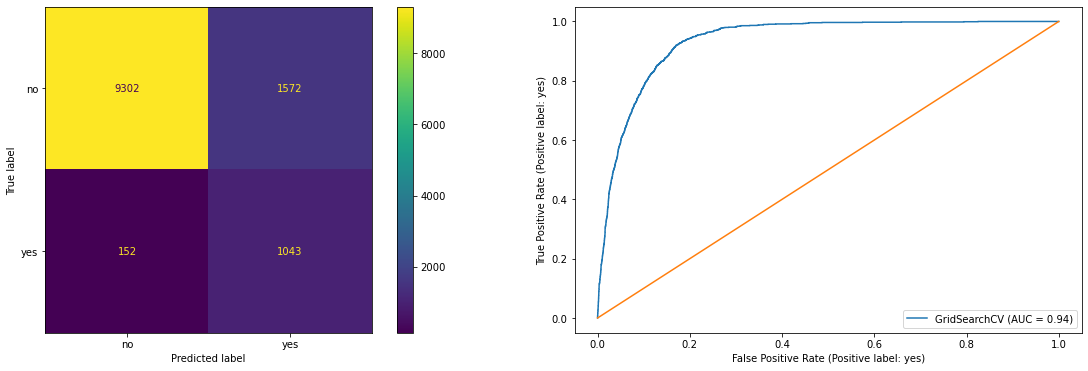

In [190]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

### KNN with GridSearch CV


In [191]:
knn_params = {'knn__n_neighbors': range(1, 15, 1)},

knn_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
#     ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_grid = GridSearchCV(knn_pipe, param_grid=knn_params, scoring='roc_auc',cv=5)
print(knn_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'knn', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])


In [192]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: total: 6min 13s
Wall time: 2min 55s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=({'knn__n_neighbors': range(1, 15)},),
             scoring='roc_auc')

In [193]:
y_predict_train = knn_grid.predict(X_train)
y_predict_test = knn_grid.predict(X_test)
y_hat_probs = knn_grid.predict_proba(X_test)
print('ROCAUC score:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('Train Accuracy score:', accuracy_score(y_train, y_predict_train))
print('Test Accuracy score:', accuracy_score(y_test, y_predict_test))
# print('F1 score:',f1_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

ROCAUC score: 0.9147685585285388
Train Accuracy score: 0.9205554371759358
Test Accuracy score: 0.9173088076891209
              precision    recall  f1-score   support

          No       0.93      0.98      0.96     10874
         Yes       0.67      0.33      0.44      1195

    accuracy                           0.92     12069
   macro avg       0.80      0.66      0.70     12069
weighted avg       0.90      0.92      0.90     12069



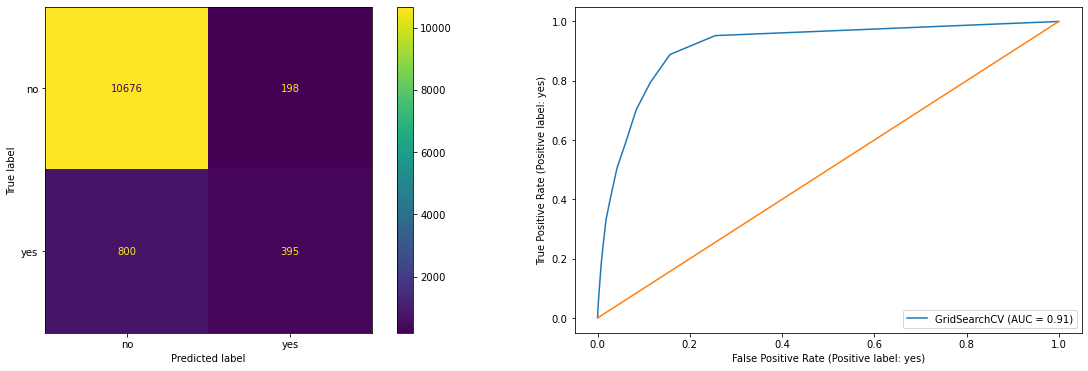

In [194]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

### Decision Trees with GridSearchCV

In [195]:
dt_params = {'dt__max_depth': range(1,7),
         'dt__min_samples_split': [.1,.2,.3,.05],
          'dt__criterion': ['gini','entropy'],
          'dt__min_samples_leaf': [1,2,3,4,5]
         }

dt_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer),
#     ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state = 42))
])

dt_grid = GridSearchCV(dt_pipe, param_grid=dt_params, scoring='roc_auc',cv=5)
print(dt_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'dt', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'dt__ccp_alpha', 'dt__class_weight', 'dt__criterion', 'dt__max_depth', 'dt__max_features', 'dt__max_leaf_nodes', 'dt__min_impurity_decrease', 'dt__min_samples_leaf', 'dt__min_samples_spl

In [196]:
%%time
dt_grid.fit(X_train, y_train)

CPU times: total: 3min 32s
Wall time: 3min 33s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(1, 7),
                         'dt__min_samples_leaf': [1, 2, 3, 4, 5],
                         'dt__min_samples_split': [0.1, 0.2, 0.3, 0.05]},
             scoring='roc_auc')

In [197]:
print(dt_grid.best_params_)

{'dt__criterion': 'entropy', 'dt__max_depth': 6, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 0.05}


In [198]:
y_predict_train = dt_grid.predict(X_train)
y_predict_test = dt_grid.predict(X_test)
y_hat_probs = dt_grid.predict_proba(X_test)
print('ROCAUC score:',roc_auc_score(y_test, y_hat_probs[:, 1]))
print('Train Accuracy score:', accuracy_score(y_train, y_predict_train))
print('Test Accuracy score:', accuracy_score(y_test, y_predict_test))
# print('F1 score:',f1_score(y_test, y_predict_test))
print(classification_report(y_test, y_predict_test, target_names=['No', 'Yes']))

ROCAUC score: 0.9323649055787748
Train Accuracy score: 0.9193124511684069
Test Accuracy score: 0.9199602286850609
              precision    recall  f1-score   support

          No       0.94      0.98      0.96     10874
         Yes       0.66      0.39      0.49      1195

    accuracy                           0.92     12069
   macro avg       0.80      0.68      0.72     12069
weighted avg       0.91      0.92      0.91     12069



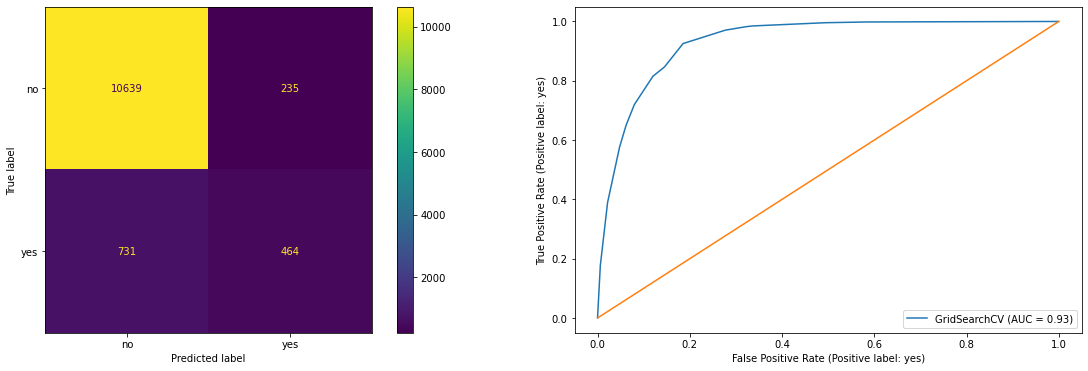

In [199]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[0])
RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

### SVM (reduced Dataset) with GridSearchCV

In [200]:
df_reduced = pd.read_csv('data/bank-additional.csv', sep = ';')

df_reduced=df_reduced[(df_reduced['age']>20) & (df_reduced['age']<70) ]
df_reduced=df_reduced[(df_reduced['duration']<1000) ]

X = df_reduced.drop('y', axis = 1)
y = df_reduced['y']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size=0.3, random_state=22)


In [201]:
X_train['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [202]:
svc_params = {'svc__C': [0.1,1, 10, 100], 'svc__gamma': [1,0.1,0.01,0.001],'svc__kernel': ['rbf', 'poly', 'sigmoid']}

num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
ordinal_cols =  ['education','month','day_of_week'] 
ohe_cols = ['marital', 'default', 'housing', 'loan','contact','poutcome','job']

ordinal_ohe_transformer_red = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ohe_cols),
#  (OrdinalEncoder(categories = [['university.degree','high.school','basic.9y','professional.course','basic.4y','basic.6y','unknown','illiterate'],['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
#        'sep'],[['mon', 'tue', 'wed', 'thu', 'fri']]]), ordinal_cols),
           (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),ordinal_cols) ,                                  
                                          remainder=StandardScaler())

svc_pipe = Pipeline([
    ('transformer', ordinal_ohe_transformer_red),
#     ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

svc_grid = GridSearchCV(svc_pipe, param_grid=svc_params, scoring='roc_auc',cv=5)
print(svc_pipe.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'svc', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__unknown_value', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__pro

In [203]:
%%time
svc_grid.fit(X_train_red, y_train_red)

CPU times: total: 2min 54s
Wall time: 2min 55s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['marital',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'job']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['education',
                                                                          'month',
                                                                          'day_of_week'])])),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='roc_auc')

In [204]:
y_predict_train_red = svc_grid.predict(X_train_red)
y_predict_test_red = svc_grid.predict(X_test_red)
y_hat_probs_red = svc_grid.predict_proba(X_test_red)
print('ROCAUC score:',roc_auc_score(y_test_red, y_hat_probs_red[:, 1]))
print('Train Accuracy score:', accuracy_score(y_train_red, y_predict_train_red))
print('Test Accuracy score:', accuracy_score(y_test_red, y_predict_test_red))
# print('F1 score:',f1_score(y_test, y_predict_test))
print(classification_report(y_test_red, y_predict_test_red, target_names=['No', 'Yes']))

ROCAUC score: 0.9215416936005171
Train Accuracy score: 0.9123248293208768
Test Accuracy score: 0.9204355108877722
              precision    recall  f1-score   support

          No       0.93      0.99      0.96      1092
         Yes       0.59      0.22      0.32       102

    accuracy                           0.92      1194
   macro avg       0.76      0.60      0.64      1194
weighted avg       0.90      0.92      0.90      1194



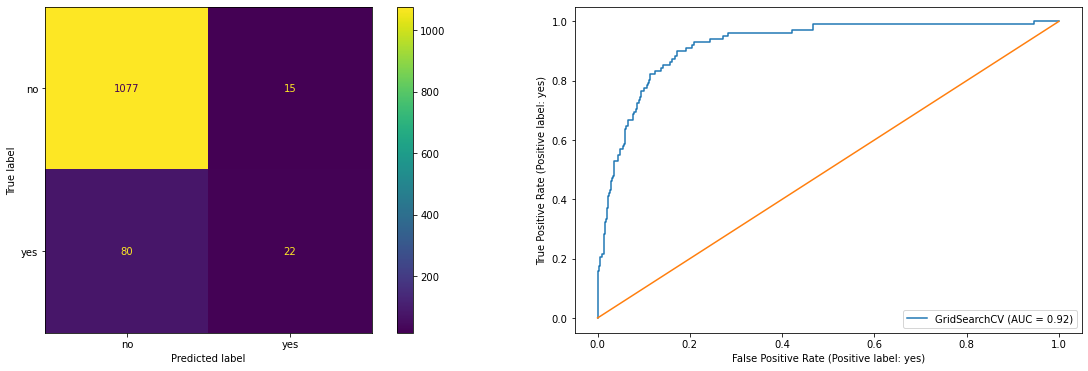

In [205]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
ConfusionMatrixDisplay.from_estimator(svc_grid, X_test_red, y_test_red, ax = ax[0])
RocCurveDisplay.from_estimator(svc_grid, X_test_red, y_test_red, ax = ax[1])
ax[1].plot(np.array([0, 1]), np.array([0, 1]))

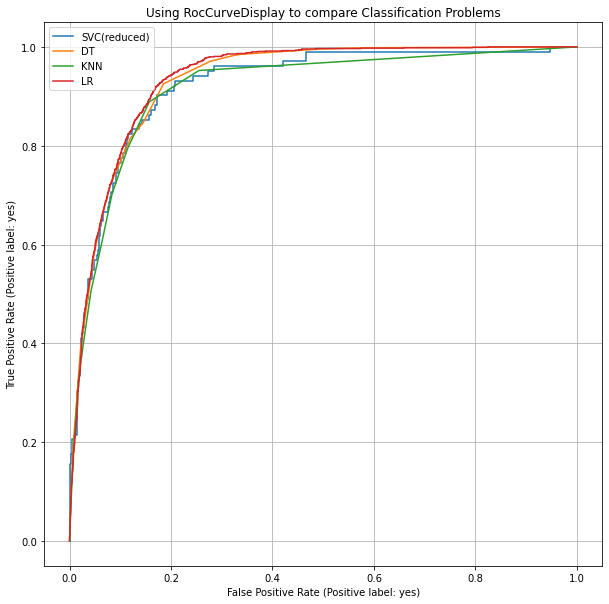

In [207]:
fig, ax = plt.subplots(figsize=(10, 10))
RocCurveDisplay.from_estimator(svc_grid, X_test_red, y_test_red, ax = ax,label = 'SVC(reduced)')
RocCurveDisplay.from_estimator(dt_grid, X_test, y_test, ax = ax,label = 'DT')
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, ax = ax,label = 'KNN')
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, ax = ax,label = 'LR')
plt.grid()
plt.title('Using RocCurveDisplay to compare Classification Problems')
plt.legend();


In [208]:
res_dict_tuned = {'model': ['Logistic Regression','KNN', 'Decision Tree', 'SVC (Reduced)'],
'rocauc score': [94, 91, 93, 92],
'train score':[85, 92, 92, 91],
'test score':[86, 92, 92, 92],
'train time': ['56s', '3m 18s', '3m 48s', '2m 55s']}
results_df_tuned = pd.DataFrame(res_dict_tuned).set_index('model')
results_df_tuned



,rocauc score,train score,test score,train time
model,,,,
Logistic Regression,94,85,86,56s
KNN,91,92,92,3m 18s
Decision Tree,93,92,92,3m 48s
SVC (Reduced),92,91,92,2m 55s


####  After hyper parameter tuning, Logistic Regression has the best rocauc score and took the least training time
##### Decision Tree also has comparable score at max_depth set to 6  but definitely took a little longer to train.
##### Let's create a new pipleline using the selected hyper parameters for Logistic Regression


In [209]:
%%time
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
ordinal_cols=['education','month','day_of_week']
ohe_cols = ['marital', 'default', 'housing', 'loan','contact','poutcome','job']

ord_ohe_transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ohe_cols),
  (OrdinalEncoder(), ordinal_cols),
#           (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),ordinal_cols) ,                                  
                                          remainder=StandardScaler())


lr_model_final = Pipeline([('transformer', ord_ohe_transformer),('classifier', LogisticRegression(C= 1.0, penalty= 'l1', solver= 'liblinear'))])
lr_model_final.fit(X_train, y_train)
y_predict_train = lr_model_final.predict(X_train)
y_predict_test = lr_model_final.predict(X_test)

CPU times: total: 2.36 s
Wall time: 2.36 s


In [210]:
lr_model_final.score(X_test,y_test)

0.9221145082442621

In [107]:
# pipeline = make_pipeline(ordinal_ohe_transformer, LogisticRegression(C= 1.0, penalty= 'l1', solver= 'liblinear'))
# pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['marital', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome', 'job']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['education', 'month',
                                                   'day_of_week'])])),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [211]:
#lgr_grid.best_estimator_.named_steps['transformer'].transformers_[1][1].categories_[1]

columnnames = []
columnnames.append((lr_model_final.named_steps['transformer'].transformers_[0][1].get_feature_names()))
columnnames.append((lr_model_final.named_steps['transformer'].transformers_[1][1].categories_[0]))
columnnames.append((lr_model_final.named_steps['transformer'].transformers_[1][1].categories_[1]))
columnnames.append(np.array(num_cols))
columnnames = np.concatenate(columnnames)
columnnames

array(['x0_divorced', 'x0_married', 'x0_single', 'x0_unknown', 'x1_no',
       'x1_unknown', 'x1_yes', 'x2_no', 'x2_unknown', 'x2_yes', 'x3_no',
       'x3_unknown', 'x3_yes', 'x4_cellular', 'x4_telephone',
       'x5_failure', 'x5_nonexistent', 'x5_success', 'x6_admin.',
       'x6_blue-collar', 'x6_entrepreneur', 'x6_housemaid',
       'x6_management', 'x6_retired', 'x6_self-employed', 'x6_services',
       'x6_student', 'x6_technician', 'x6_unemployed', 'x6_unknown',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'apr',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype=object)

In [224]:
coefs=lr_model_final.named_steps['classifier'].coef_[0].flatten()

In [214]:
# Zip coefficients and names together and make a DataFrame
zipped = zip(columnnames, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

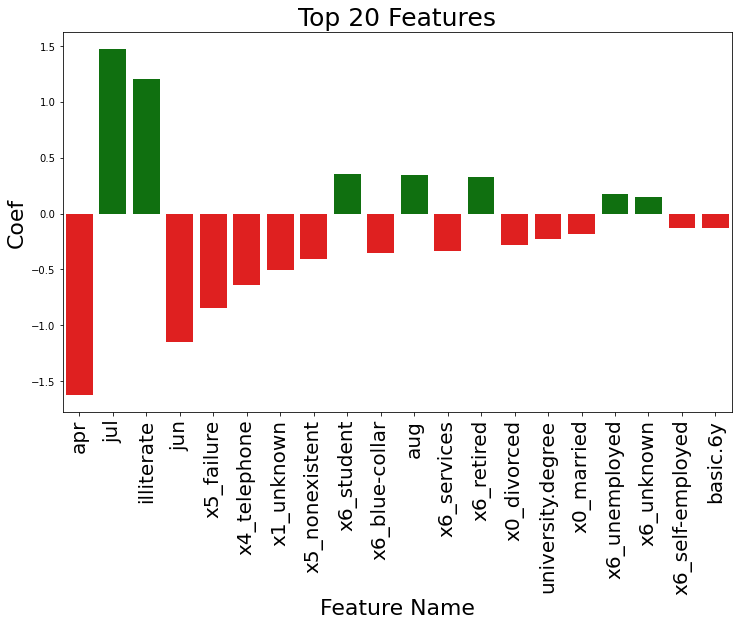

In [218]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

### Findings:

#### The best model that is able to maximize the true postive so that there are no missed opportunities, is achieved  by Logistic Regression followed by Decision Tree 
#### At the same time it is also important not to scam the customers and that is achieved by SVM. But using the full dataset it takes more than 4 hours to train.
#### Inspecting the coefficients indicates that less educated groups and students and retirees are more susceptible to term deposits
#### The months of July and Aug seem to add to successful calls, it could be because of summer college semesters, coorelated to the education group




                                                      

### Next Steps and Recommendations:

#### We may need to collect more data to balance the classes.    
#### Add more feature like gender and other economical factors to find cause and effect
#### Try  different ranges for hyperparameter tuning.  May be use pruning to improve the perofrmance of decision tree
#### Since contact mode telephone does not have a positive coefficient, the camplaigns can focus on other modes of communication like email or flyers
